<a href="https://colab.research.google.com/github/MercuryAtom31/Business-Physics-AI-Lab/blob/main/Experiment_DataSynthesizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 Installing Required Libraries
This command installs the necessary Python libraries for the experiment:
- `numpy`: Supports numerical operations.
- `pandas`: Handles data manipulation and analysis.
- `DataSynthesizer`: Generates synthetic data while preserving statistical properties of real data.

In [ ]:
!pip install numpy pandas DataSynthesizer

### 📌 Importing Required Libraries
- `pandas`: Used for data manipulation and handling DataFrames.
- `DataDescriber` (from DataSynthesizer): Analyzes the real dataset and generates metadata.
- `DataGenerator` (from DataSynthesizer): Uses the metadata to create synthetic data.


In [ ]:
import pandas as pd
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator

### 📌 Generating Metadata from the Real Dataset
- **`DataDescriber()`**: Creates an instance of the DataDescriber to analyze the real dataset.
- **`describe_dataset_in_independent_attribute_mode()`**:
  - Reads the dataset (`customers_transactions_dataset.csv`).
  - Uses `epsilon=5.0`, meaning lower noise and more realistic synthetic data.
  - Identifies attribute types and distributions independently.
- **`save_dataset_description_to_file()`**: Saves the generated metadata as `metadata_customers_transactions_dataset.json` for later use in synthetic data generation.


In [ ]:
from DataSynthesizer.DataDescriber import DataDescriber

describer = DataDescriber()
describer.describe_dataset_in_independent_attribute_mode(
    dataset_file="customers_transactions_dataset.csv",
    epsilon=5.0  # Higher epsilon, less noise, more realism
)
describer.save_dataset_description_to_file("metadata_customers_transactions_dataset.json")

### 📌 Generating Synthetic Data from Metadata
- **`DataGenerator()`**: Initializes the synthetic data generator.
- **`generate_dataset_in_independent_mode()`**:
  - Uses `metadata_customers_transactions_dataset.json` to create synthetic data.
  - Generates **1,000 synthetic records** (`n=1000`).
  - Attributes are generated independently, following the statistical properties learned from the real dataset.
- **`to_csv()`**: Saves the synthetic dataset as `synthetic_customer_transactions.csv` for further analysis.
- **`print(synthetic_df.head())`**: Displays the first five rows of the synthetic dataset for verification.

In [ ]:
from DataSynthesizer.DataGenerator import DataGenerator

generator = DataGenerator()
generator.generate_dataset_in_independent_mode(
    description_file="metadata_customers_transactions_dataset.json",
    n=1000
)

# Save corrected synthetic dataset
synthetic_df = generator.synthetic_dataset
synthetic_df.to_csv("synthetic_customer_transactions.csv", index=False)

# Check realism again
print(synthetic_df.head())

   Customer ID     Name  Surname Gender     Birthdate  Transaction Amount  \
0            0    rgkfe     jsco      M  1.129680e+09          319.283471   
1            1  euxsswv    yyktf      F  1.129680e+09          177.847321   
2            2    klotq    ddbmo      F  1.129680e+09           31.420214   
3            3    yybih    pifpd      M  1.129680e+09           43.435395   
4            4    fpxju  vwngdzp      F  1.129680e+09          589.432501   

           Date Merchant Name     Category  
0  1.697242e+09  prcyomiytnjg     Clothing  
1  1.697242e+09    sjjodczixw       Travel  
2  1.682762e+09    emcqnelkpk  Electronics  
3  1.677645e+09      eglvdmsr  Electronics  
4  1.697242e+09    gurnrasedw     Clothing  


/usr/local/lib/python3.11/dist-packages/DataSynthesizer/datatypes/StringAttribute.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['rgkfe' 'euxsswv' 'klotq' 'yybih' 'fpxju' 'axoctzv' 'eaufy' 'reyarri'
 'jejmqdao' 'xayl' 'bsomify' 'crpdv' 'qsfyw' 'shxryenz' 'tpto' 'sza'
 'egum' 'dsntrbs' 'mphchnq' 'byqnfsyq' 'meqtoior' 'kognewp' 'okzlwo'
 'luxczya' 'yogs' 'woznmf' 'txy' 'tiizzpukk' 'urahgc' 'bqwnrw' 'hbvc'
 'asggdve' 'xtsgz' 'oprvb' 'jtrl' 'axdzw' 'eutpf' 'uejqq' 'zfawdijkg'
 'mlcrhhg' 'xfjy' 'mibon' 'pewuchn' 'ifh' 'ppjzwzz' 'tjldhsi' 'bdsr'
 'oxkk' 'ylno' 'xfxkh' 'rfglv' 'ylyrv' 'szfrirkhly' 'voa' 'bzvb' 'ezmis'
 'mytdkh' 'uoio' 'ddrxv' 'vmnh' 'pohtk' 'nsbl' 'sozfyyi' 'sclm' 'lier'
 'mrkq' 'klckmrh' 'qkc' 'zplotuj' 'dqa' 'ngedtrqh' 'ylwci' 'izgubyvet'
 'lfhwk' 'wjttsxt' 'zzf' 'znpyt' 'myvl' 'zaoha' 'bwpn' 'wlpek' 'vhklwa'
 'rmlw' 'pwuccke' 'etmrq' 'pggq' 'jnyjv' 'cjoy' 'euaknl' 'cfhxrdpc'
 'qtssk' 

### 📌 Statistical and Visual Validation of Synthetic Data
#### **1. Load Datasets**
- Reads both **real (`customers_transactions_dataset.csv`)** and **synthetic (`synthetic_customer_transactions.csv`)** datasets into pandas DataFrames.

#### **2. Perform Statistical Validation (T-test)**
- **T-test (`ttest_ind()`)**:
  - Compares the **Transaction Amount** distributions between real and synthetic data.
  - Outputs **T-test statistic** and **p-value**.
  - If **p-value > 0.05**, the synthetic data is statistically similar to the real data.
  - If **p-value <= 0.05**, the synthetic data significantly differs from the real data.

#### **3. Visual Validation (Histogram Comparison)**
- **`sns.histplot()`**:
  - **Blue (Real Data)** vs. **Orange (Synthetic Data)**
  - Overlays Kernel Density Estimate (**KDE**) to compare distributions.
- **Final check**: If the distributions align well, the synthetic data can be considered a good representation of the real dataset.

T-test Statistics: -1.007
P-value: 0.314
✅ Synthetic data is statistically similar to real data.


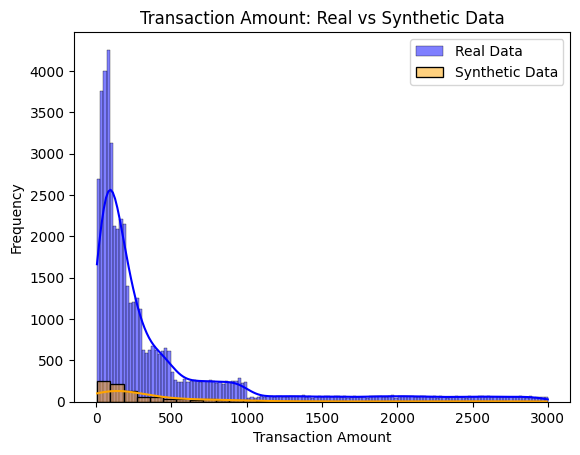

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
real_df = pd.read_csv("customers_transactions_dataset.csv")
synthetic_df = pd.read_csv("synthetic_customer_transactions.csv")

# Statistical validation
t_stat, p_val = ttest_ind(real_df['Transaction Amount'], synthetic_df['Transaction Amount'])
print(f"T-test Statistics: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val > 0.05:
    print("✅ Synthetic data is statistically similar to real data.")
else:
    print("⚠️ Synthetic data significantly differs from real data.")

# Plot for visual validation
sns.histplot(real_df['Transaction Amount'], color='blue', kde=True, label='Real Data')
sns.histplot(synthetic_df['Transaction Amount'], color='orange', kde=True, label='Synthetic Data')
plt.legend()
plt.title('Transaction Amount: Real vs Synthetic Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 📌 Customer Segmentation using K-Means Clustering
#### **1. Prepare Data for Clustering**
- Selects the **Transaction Amount** column from the synthetic dataset as the feature for clustering.

#### **2. Train the K-Means Model**
- Uses **KMeans clustering** (`n_clusters=3`):
  - Segments customers into **3 groups** based on their transaction amounts.
  - `random_state=42` ensures reproducibility.

#### **3. Assign Cluster Labels**
- Adds a **'Segment'** column to the synthetic dataset, indicating the assigned cluster for each customer.

#### **4. Verification**
- Displays the first few rows (`.head()`) to confirm that segmentation was applied correctly.


In [ ]:
from sklearn.cluster import KMeans

X = synthetic_df[['Transaction Amount']]

# Train KMeans segmentation model
kmeans = KMeans(n_clusters=3, random_state=42)
synthetic_df['Segment'] = kmeans.fit_predict(X)

# Display the first rows to verify
print(synthetic_df.head())

   Customer ID     Name  Surname Gender     Birthdate  Transaction Amount  \
0            0    rgkfe     jsco      M  1.129680e+09          319.283471   
1            1  euxsswv    yyktf      F  1.129680e+09          177.847321   
2            2    klotq    ddbmo      F  1.129680e+09           31.420214   
3            3    yybih    pifpd      M  1.129680e+09           43.435395   
4            4    fpxju  vwngdzp      F  1.129680e+09          589.432501   

           Date Merchant Name     Category  Segment  
0  1.697242e+09  prcyomiytnjg     Clothing        0  
1  1.697242e+09    sjjodczixw       Travel        0  
2  1.682762e+09    emcqnelkpk  Electronics        0  
3  1.677645e+09      eglvdmsr  Electronics        0  
4  1.697242e+09    gurnrasedw     Clothing        2  


### 📌 Visualizing Customer Segmentation using Strip Plot
#### **1. Configure Plot Size**
- Sets the figure size to **10x6** for better visualization.

#### **2. Generate Strip Plot**
- Uses **Seaborn's stripplot** to display how transaction amounts are distributed across different customer segments.
- `x='Transaction Amount'`: **X-axis** represents the transaction amount.
- `y='Segment'`: **Y-axis** represents the assigned customer segment.
- `hue='Segment'`: Colors each data point based on its assigned segment.
- `palette='viridis'`: Uses the Viridis colormap for distinct segment colors.
- `jitter=0.3`: Adds slight random variation to points to prevent overlap.
- `size=6`: Defines the size of data points for better visibility.

#### **3. Customize Labels & Legend**
- Adds **titles and axis labels** to enhance readability.
- Uses `plt.legend(title='Segment')` to display a legend mapping segments to colors.

#### **4. Show the Plot**
- Displays the **segmentation pattern** based on transaction amount.


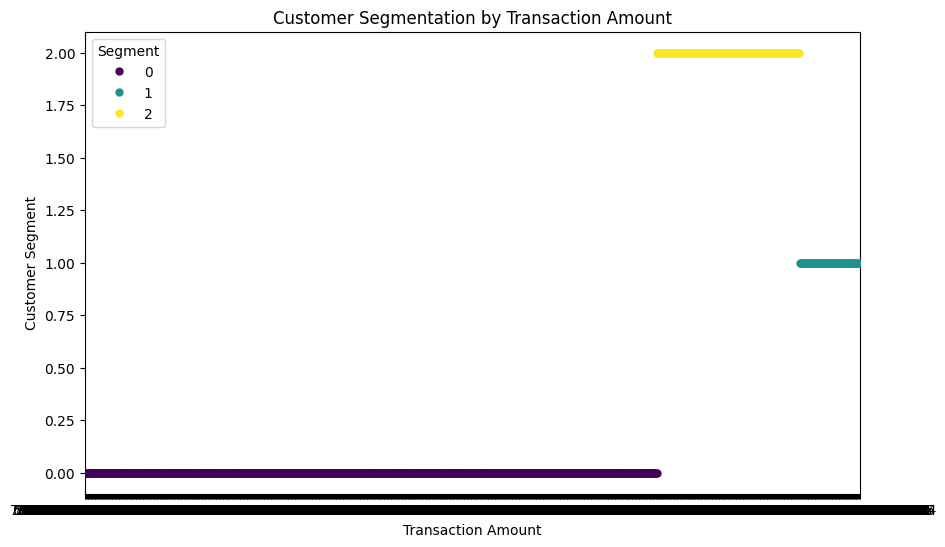

In [ ]:
plt.figure(figsize=(10, 6))

sns.stripplot(
    x='Transaction Amount',
    y='Segment',
    data=synthetic_df,
    hue='Segment',
    palette='viridis',
    jitter=0.3,
    size=6,
    legend='full'
)

plt.title('Customer Segmentation by Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Segment')
plt.legend(title='Segment')
plt.show()